# **The Causes of Heart Disease Analysis**

This study aims to predict heart disease using a comprehensive analysis of a heart disease dataset.


What is the Lifecycle of Machine Learning?
**Step 1  : Understanding of problem : **which state that you must have to understand the problem and what sort issue we are going to face.

**Step 2  : Collection of resources(Data Collection).**

**Step 3  : fill/delete Of Raw Data which is inconsistant**

**Step 4  : Exploratory Data Analysis :** which is also called EDA, its used for getting the important data sets, main characteristics, show them with the help of data visualization methods.

**Step 5 : Data Pre-processing :** means changing the Raw Data into cleaned form.

**Step 6 : Model Training :** Choose Best Model

**Step 1:**
**What is the Problem Statement:-** The goal of this study is to leverage machine learning techniques to predict the presence of heart disease based on a range of patient attributes.

Step 2
Collection of data
 i  got the data from the site of Kaggle.
 File Description

**File Name** : Student-performance-factors
**File Format**: CSV
**Number of Records**: 6,607
**Number of Features**: 20

The data has 12 column and 918 rows.

# For using python, panmachine learning algorithm we need to imports those library which we will use in the project.

In [ ]:
import  pandas  as pd # importing pandas
import  numpy  as np # importing numpy
import  seaborn  as sns # importing seaborn
import  matplotlib.pyplot  as  plt # importing matplotlib
from   sklearn.linear_model import  LogisticRegression
from   sklearn.preprocessing import LabelEncoder
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.svm import SVC
from   sklearn.metrics import confusion_matrix, classification_report
from   sklearn.model_selection  import train_test_split, RandomizedSearchCV
from   sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Reading the file we use read_csv which we are storing in fd
fd=pd.read_csv('heart.csv')
for showing the top 10 element i used fd.head(10) by default it will take only the top 5 values

In [ ]:
fd = pd.read_csv( 'heart.csv' )
fd.head(10)

,Age,Gender,ChestPain_Type,Resting_BP,Cholesterol,Fasting_BS,Resting_ECG,Max_HR,Exercise_Angina,Old_peak,ST_Slope,Heart_Disease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


I used fd.info which illestrate the information of the data.

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              918 non-null    int64  
 1   Gender           918 non-null    object 
 2   ChestPain_Type   918 non-null    object 
 3   Resting_BP       918 non-null    int64  
 4   Cholesterol      918 non-null    int64  
 5   Fasting_BS       918 non-null    int64  
 6   Resting_ECG      918 non-null    object 
 7   Max_HR           918 non-null    int64  
 8   Exercise_Angina  918 non-null    object 
 9   Old_peak         918 non-null    float64
 10  ST_Slope         918 non-null    object 
 11  Heart_Disease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


fd.shape gives the information of the data i mentioned that we do have 918 raws and 18 colums

In [ ]:
fd.shape

(918, 12)

how we will describe the data we use command fd.described

In [ ]:
fd.describe()

,Age,Resting_BP,Cholesterol,Fasting_BS,Max_HR,Old_peak,Heart_Disease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


If we want to check whether we do have check Values are lost or not we can do it by .isnull and we call sum function to get the answer

In [ ]:

fd.isnull().sum()

,0
Age,0
Gender,0
ChestPain_Type,0
Resting_BP,0
Cholesterol,0
Fasting_BS,0
Resting_ECG,0
Max_HR,0
Exercise_Angina,0
Old_peak,0


checking again the duplicate elements with this command .duplicated().sum()

In [ ]:
fd.duplicated().sum()

0

** to find the value count we an predefined function .value_count()**

In [ ]:
fd['Heart_Disease'].value_counts()

,count
Heart_Disease,
1,508
0,410


** to find the value count we an predefined function .value_count()**

In [ ]:
fd.groupby( "Gender" )[ "Heart_Disease" ].value_counts()

Gender  Heart_Disease
F       0                143
        1                 50
M       1                458
        0                267
Name: count, dtype: int64

** to find the value count we an predefined function .count()**

In [ ]:
fd.groupby([ 'Fasting_BS' , 'Heart_Disease' ] )[ 'Heart_Disease' ].count()

Fasting_BS  Heart_Disease
0           0                366
            1                338
1           0                 44
            1                170
Name: Heart_Disease, dtype: int64

In [ ]:
fd[fd.Heart_Disease == 1][ 'ChestPain_Type' ].value_counts()

,count
ChestPain_Type,
ASY,392
NAP,72
ATA,24
TA,20


In [ ]:
fd.groupby([ 'Gender' ])[ 'ChestPain_Type' ].value_counts( normalize=True )

Gender  ChestPain_Type
F       ASY               0.362694
        ATA               0.310881
        NAP               0.274611
        TA                0.051813
M       ASY               0.587586
        NAP               0.206897
        ATA               0.155862
        TA                0.049655
Name: proportion, dtype: float64

#Feature Engineering

In [ ]:
categoric_feature = [ col for col  in  fd.columns  if  fd[ col ].dtype in [ 'O','bool_' ]]

pd.DataFrame({  'cardinality': fd[categoric_feature].nunique(),  })
numeric_features = [ feature for feature in fd.columns if fd[ feature ].dtype != 'O' ]

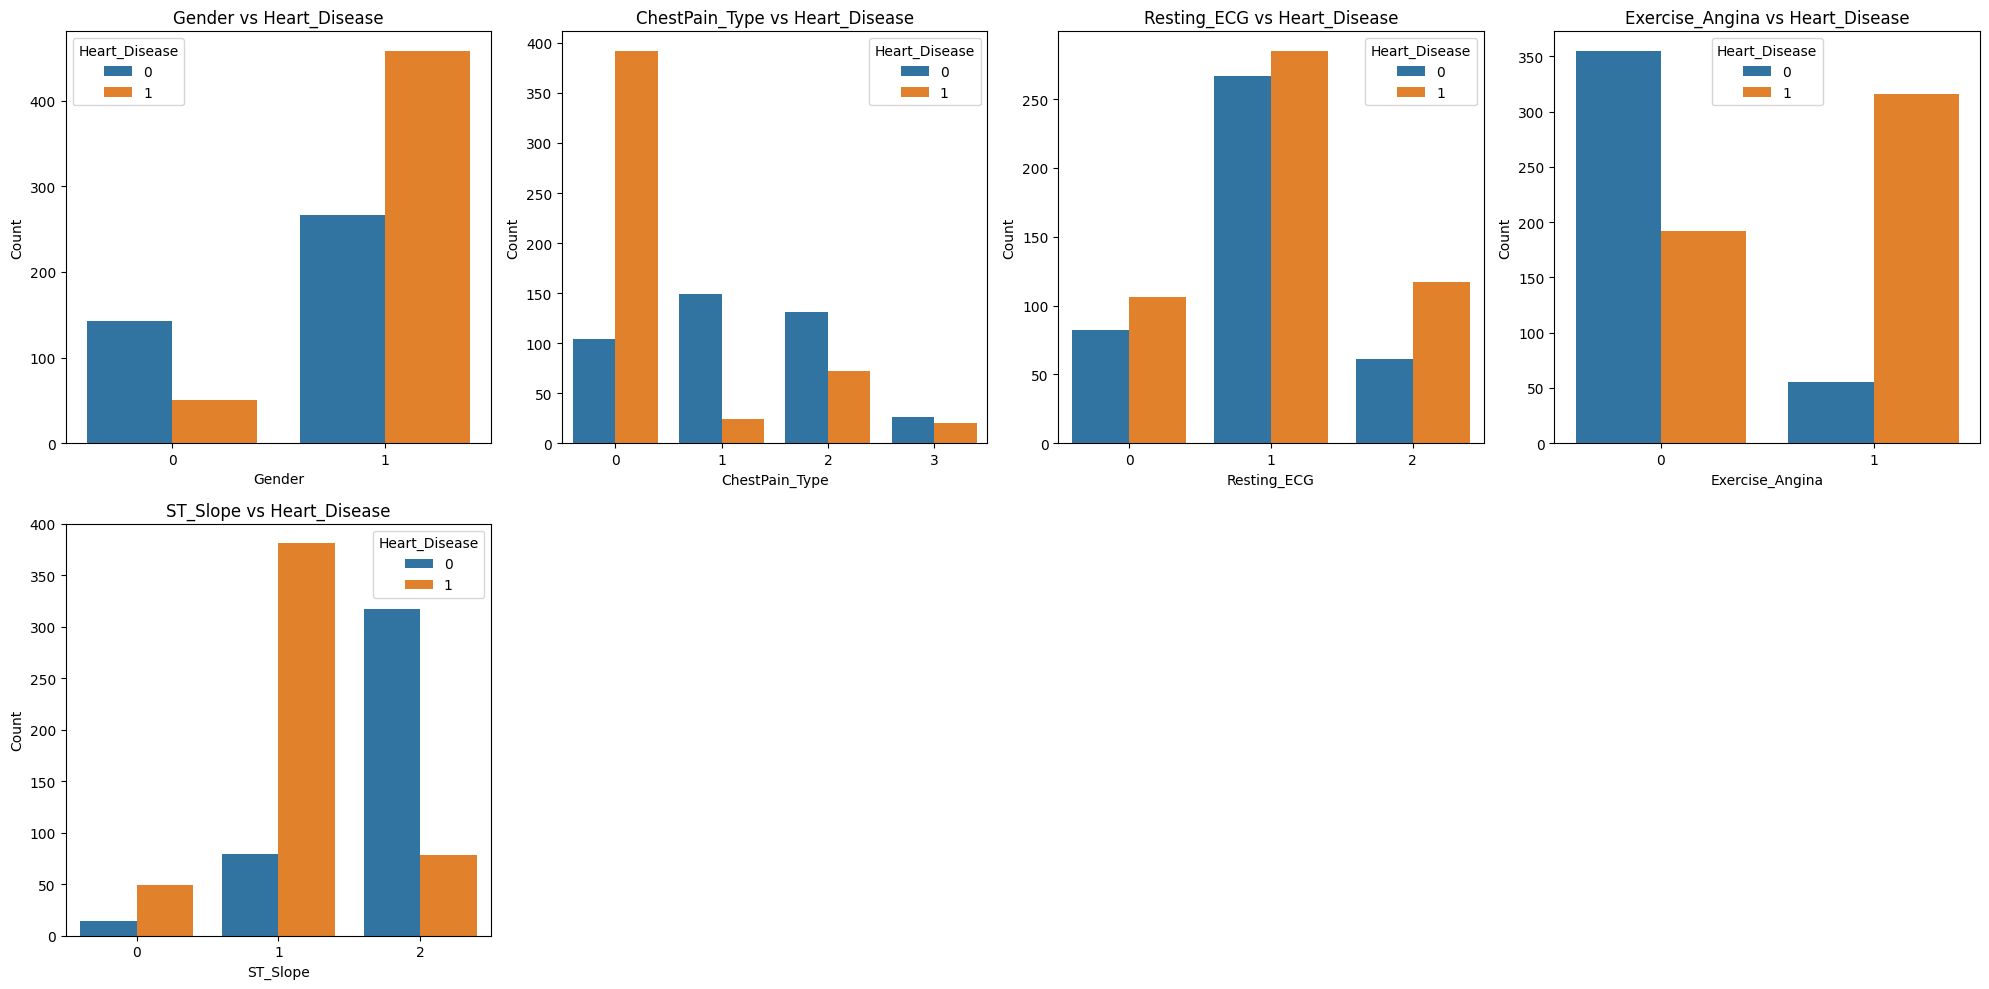

In [ ]:
plt.figure(figsize=( 20, 10 ))

for i, col in enumerate( categoric_feature, 1 ):
    plt.subplot( 2 , 4 , i )
    sns.countplot( fd, x=col, hue='Heart_Disease' )
    plt.title( f'{col} vs Heart_Disease' )
    plt.xlabel( col )
    plt.ylabel( 'Count' )


plt.tight_layout()
plt.show()



In [ ]:
cate_analy = {}

for i in categoric_feature:
    c_t = pd.crosstab(fd[i], fd[ 'Heart_Disease' ], normalize='index')
    cate_analy[i] = c_t


categoric_analysis_fd = pd.concat( cate_analy.values(), keys = cate_analy.keys() )
categoric_analysis_fd

Heart_Disease             0         1
Gender          0  0.740933  0.259067
                1  0.368276  0.631724
ChestPain_Type  0  0.209677  0.790323
                1  0.861272  0.138728
                2  0.645320  0.354680
                3  0.565217  0.434783
Resting_ECG     0  0.436170  0.563830
                1  0.483696  0.516304
                2  0.342697  0.657303
Exercise_Angina 0  0.648995  0.351005
                1  0.148248  0.851752
ST_Slope        0  0.222222  0.777778
                1  0.171739  0.828261
                2  0.802532  0.197468

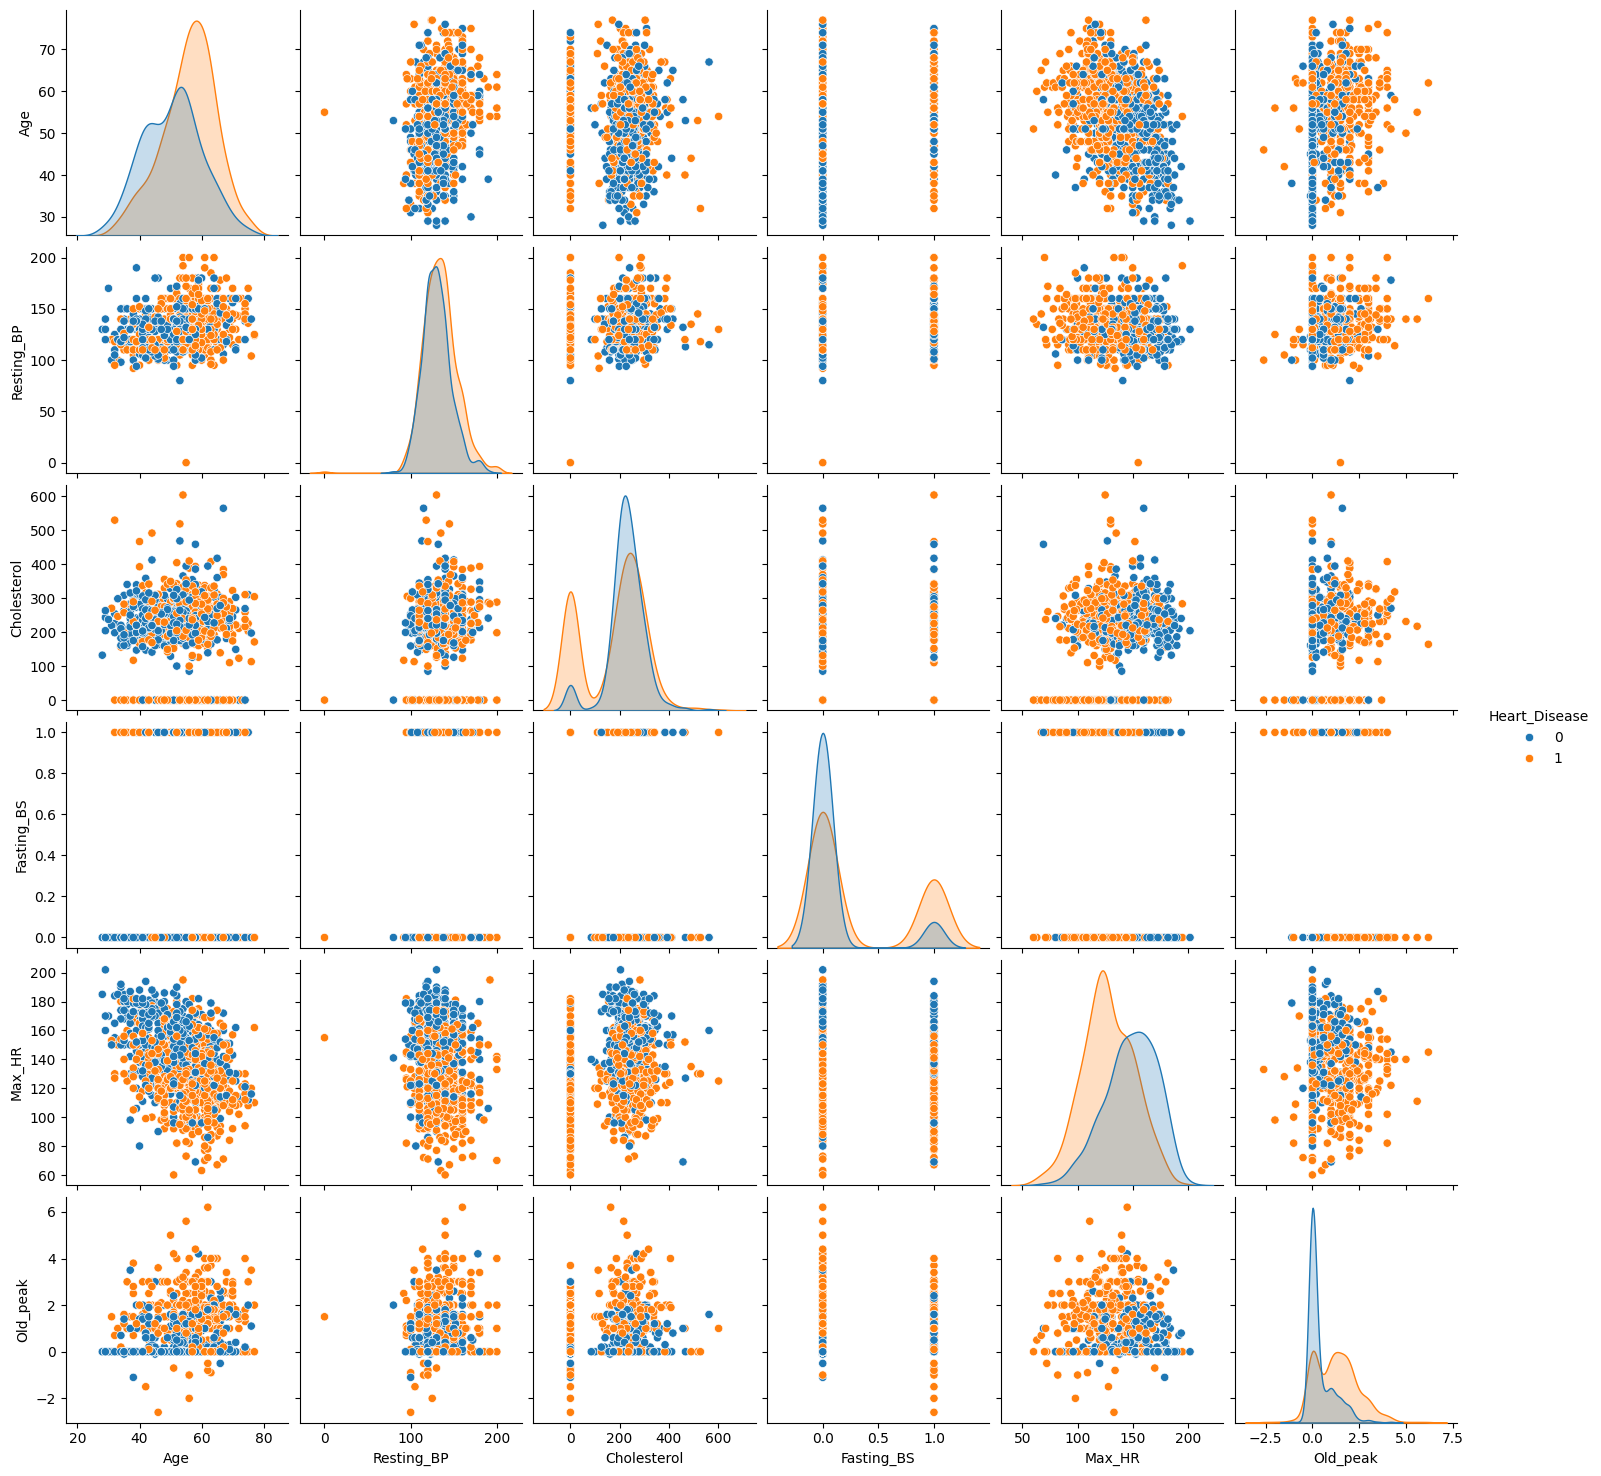

In [ ]:
numeric_features = [ feature for feature in fd.columns if fd[ feature ].dtype != 'O']
sns.pairplot( fd[ numeric_features ], hue= "Heart_Disease", diag_kind="kde")
plt.show()

<Axes: xlabel='Heart_Disease', ylabel='count'>

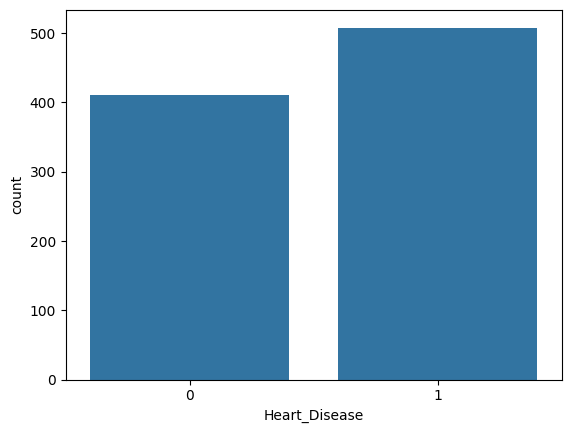

In [ ]:
ccnt = sns.countplot( fd,  x="Heart_Disease")
ccnt

In [ ]:
label = LabelEncoder()
object_col = fd.select_dtypes( include='object' )
object_col.head()

,Gender,ChestPain_Type,Resting_ECG,Exercise_Angina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
non_object_col = fd.select_dtypes( exclude='object' )
non_object_col.head()

,Age,Resting_BP,Cholesterol,Fasting_BS,Max_HR,Old_peak,Heart_Disease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [ ]:
for col in object_col.columns:
  object_col[ col ] = label.fit_transform( object_col [ col ])


In [ ]:
  object_col.head()

,Gender,ChestPain_Type,Resting_ECG,Exercise_Angina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [ ]:
fd = pd.concat([ object_col, non_object_col ],axis=1 )
fd  =  fd.replace( 'M', 1e6 )
fd.tail()

,Gender,ChestPain_Type,Resting_ECG,Exercise_Angina,ST_Slope,Age,Resting_BP,Cholesterol,Fasting_BS,Max_HR,Old_peak,Heart_Disease
913,1,3,1,0,1,45,110,264,0,132,1.2,1
914,1,0,1,0,1,68,144,193,1,141,3.4,1
915,1,0,1,1,1,57,130,131,0,115,1.2,1
916,0,1,0,0,1,57,130,236,0,174,0.0,1
917,1,2,1,0,2,38,138,175,0,173,0.0,0


Text(0.5, 1.0, 'coorelation')

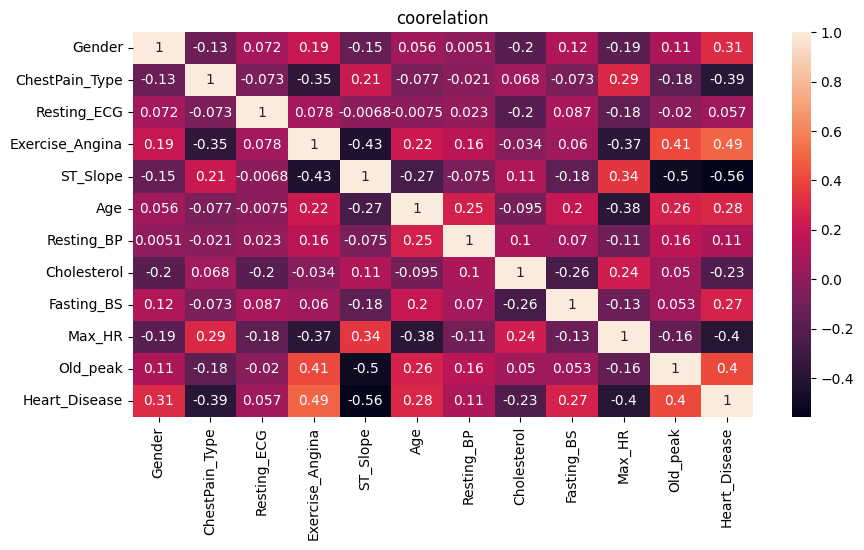

In [ ]:


plt.figure(figsize = (10, 5))

mp = sns.heatmap(fd.corr(),annot = True)
mp.set_title('coorelation')


**Used Logistic Regression here. It predicts using Gradient function with the help of cost function, to get overall loss. Here I trained model using splitted data, and tested different accuracies to get more intutuion.**

In [ ]:
l = LogisticRegression()
l.fit(X_train, y_train)
y_hat_p = l.predict(X_test)
ac_cura_cy = accuracy_score(y_test, y_hat_p)

print(f"accuracy of Logistic regression is := {ac_cura_cy} ")

print(classification_report(y_test,y_pred))

accuracy of Logistic regression is := 0.842391304347826 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



**Here I used DecisionTrees. Used training data to train the model using fit() function. Afterwards, I tested sccuracy for the new test data which model hasnt seen. Furthermore, I called classification_report functioon to get all the neccessary scores. In down you can see accuracy scores for different model.**  

In [ ]:
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train, y_train)
y_h_p = des_tree.predict(X_test)
ac_cura_cy = accuracy_score(y_test, y_h_p)

print(f"Accuracy of Decision Tree is this := {ac_cura_cy}")
print(classification_report(y_test,y_pred))

Accuracy of Decision Tree is this := 0.8097826086956522
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



**Here I used Support vector machine.
I called inbuilt function and using fit, i fitted splitted training data. Moreover, I used accuracy_score function to get accuracy for new training data, which model hast seen before. I also called classification_report function to get recall, f1, precision scores.**

In [ ]:
support = SVC()
support.fit(X_train, y_train)
p_s = support.predict(X_test)
ac_racy = accuracy_score(y_test, p_s)
print(f"Accuracy of Support Vector machine is this:= {ac_racy}")
print(classification_report(y_test,y_pred))

Accuracy of Support Vector machine is this:= 0.6847826086956522
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



Here I used RandomForest. I trained model and fitted the data like befoe.

In [ ]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rff = rforest.predict(X_test)
acur_cy = accuracy_score(y_test, rff)

print(f"accuracy of random forest as follows: {acur_cy}")
print(classification_report(y_test,y_pred))

accuracy of random forest as follows: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# **Conclusion**
**The limitations of this are, it need more training data to trian model. These model will help doctors to predict early stage of heart diseases. Apart from that, we can the fully trained model to hospitals, so it can help to diagnose clients. This pipleline is easly explainable.**

# **This project belongs to sahil Rathi**



